In [72]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
import folium

## Importing Data

In [73]:
csv_url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df= pd.read_csv(csv_url)

In [74]:
df.head(7)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois


In [75]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Task1 :Create a Line chart using the functionality of pandas to show how car sales fluctuate from year to year

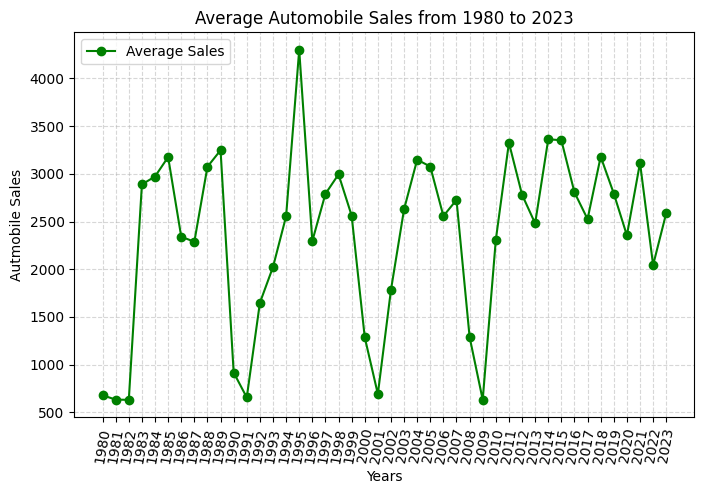

In [79]:
years= list(map(int, range(1980, 2024)))
dfL = df.groupby('Year')['Automobile_Sales'].mean()

plt.figure(figsize=(8,5))
dfL.plot(kind='line',
         color='green',
         marker='o')
plt.title('Average Automobile Sales from 1980 to 2023')
plt.xlabel('Years')
plt.ylabel('Autmobile Sales')

plt.xticks(years, rotation=80)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(['Average Sales'], loc='upper left')
plt.show()

### Task 2: Draw different lines for different vehicle type categories and visualise and analyse the differences in sales trends between different vehicle types during recessionary periods.

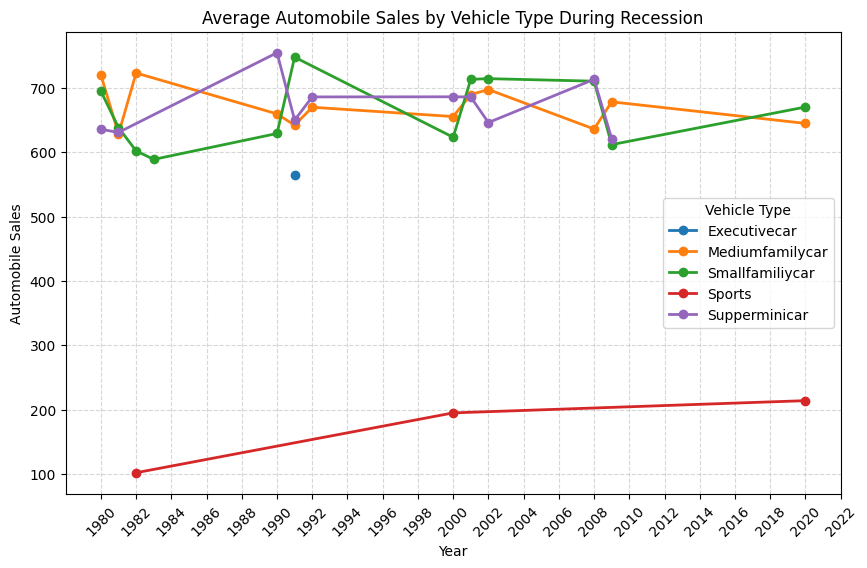

In [80]:
df_rec= df[df['Recession']== 1]

dfL2= df_rec.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
dfL2.set_index('Year', inplace=True)
dfL2 = dfL2.groupby(['Vehicle_Type'])['Automobile_Sales']

plt.figure(figsize=(10,6))
dfL2.plot(kind='line',marker='o', linewidth=2)
plt.title('Average Automobile Sales by Vehicle Type During Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

plt.xticks(years[::2], rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(title= 'Vehicle Type')

plt.show()